In [1]:
%matplotlib notebook
from pyuvdata import UVCal, UVData
import numpy as np, pylab as plt
import aipy, sys, os, glob
import uvtools, hera_qm, hera_cal

In [2]:
def get_data_dict(uvdata):
    keys = [bl+(pol,) for bl in uvdata.get_antpairs() for pol in uvdata.get_pols()]
    d = {key:uvdata.get_data(key) for key in keys}
    f = {key:uvdata.get_flags(key) for key in keys}
    return d,f

def get_gain_dict(calfits):
    g = {}
    for i,ai in enumerate(calfits.ant_array):
        for j,pj in enumerate(calfits.jones_array):
            g[(ai,aipy.miriad.pol2str[pj][0].upper())] = calfits.gain_array[i,0,:,:,j].T
    return g

In [3]:
xx_files = glob.glob('zen.2458039.*.xx.HH.uvOR')
#yy_files = glob.glob('zen.2458030.*.yy.HH.uvOR')
print xx_files
#print yy_files

['zen.2458039.12551.xx.HH.uvOR', 'zen.2458039.13297.xx.HH.uvOR', 'zen.2458039.14043.xx.HH.uvOR', 'zen.2458039.14788.xx.HH.uvOR', 'zen.2458039.15534.xx.HH.uvOR', 'zen.2458039.16280.xx.HH.uvOR', 'zen.2458039.17025.xx.HH.uvOR', 'zen.2458039.17771.xx.HH.uvOR', 'zen.2458039.18517.xx.HH.uvOR', 'zen.2458039.19262.xx.HH.uvOR', 'zen.2458039.20008.xx.HH.uvOR', 'zen.2458039.20753.xx.HH.uvOR', 'zen.2458039.21499.xx.HH.uvOR', 'zen.2458039.22245.xx.HH.uvOR', 'zen.2458039.22990.xx.HH.uvOR', 'zen.2458039.23736.xx.HH.uvOR', 'zen.2458039.24482.xx.HH.uvOR', 'zen.2458039.25227.xx.HH.uvOR', 'zen.2458039.25973.xx.HH.uvOR', 'zen.2458039.26719.xx.HH.uvOR', 'zen.2458039.27464.xx.HH.uvOR', 'zen.2458039.28210.xx.HH.uvOR', 'zen.2458039.28956.xx.HH.uvOR', 'zen.2458039.29701.xx.HH.uvOR', 'zen.2458039.30447.xx.HH.uvOR', 'zen.2458039.31193.xx.HH.uvOR', 'zen.2458039.31938.xx.HH.uvOR', 'zen.2458039.32684.xx.HH.uvOR', 'zen.2458039.33430.xx.HH.uvOR', 'zen.2458039.34175.xx.HH.uvOR', 'zen.2458039.34921.xx.HH.uvOR', 'zen.24

In [4]:
uv = UVData()
uv.read_miriad(xx_files[0])
aa = hera_cal.utils.get_aa_from_uv(uv)

In [5]:
info = hera_cal.omni.aa_to_info(aa, pols='x', tol=1)
reds = info.get_reds()
reds = hera_cal.omni.filter_reds(reds, ex_ants=[51])
sep11 = [red for red in reds if (23,24) in red][0]
print sep11
print len(sep11)
keys = ','.join(['%d_%d' % (i,j) for i,j in sep11])
print keys

[(0, 1), (1, 2), (11, 12), (12, 13), (13, 14), (23, 24), (24, 25), (25, 26), (26, 27), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (52, 53), (53, 54), (54, 55), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (120, 121), (121, 122), (122, 123), (123, 124), (141, 142), (142, 143)]
35
0_1,1_2,11_12,12_13,13_14,23_24,24_25,25_26,26_27,36_37,37_38,38_39,39_40,40_41,52_53,53_54,54_55,65_66,66_67,67_68,68_69,69_70,70_71,82_83,83_84,84_85,85_86,86_87,87_88,120_121,121_122,122_123,123_124,141_142,142_143


In [6]:
uv_info, data, flgs = aipy.miriad.read_files(xx_files, antstr=keys, polstr='xx', verbose=True)

   Reading zen.2458039.12551.xx.HH.uvOR
   Reading zen.2458039.13297.xx.HH.uvOR
   Reading zen.2458039.14043.xx.HH.uvOR
   Reading zen.2458039.14788.xx.HH.uvOR
   Reading zen.2458039.15534.xx.HH.uvOR
   Reading zen.2458039.16280.xx.HH.uvOR
   Reading zen.2458039.17025.xx.HH.uvOR
   Reading zen.2458039.17771.xx.HH.uvOR
   Reading zen.2458039.18517.xx.HH.uvOR
   Reading zen.2458039.19262.xx.HH.uvOR
   Reading zen.2458039.20008.xx.HH.uvOR
   Reading zen.2458039.20753.xx.HH.uvOR
   Reading zen.2458039.21499.xx.HH.uvOR
   Reading zen.2458039.22245.xx.HH.uvOR
   Reading zen.2458039.22990.xx.HH.uvOR
   Reading zen.2458039.23736.xx.HH.uvOR
   Reading zen.2458039.24482.xx.HH.uvOR
   Reading zen.2458039.25227.xx.HH.uvOR
   Reading zen.2458039.25973.xx.HH.uvOR
   Reading zen.2458039.26719.xx.HH.uvOR
   Reading zen.2458039.27464.xx.HH.uvOR
   Reading zen.2458039.28210.xx.HH.uvOR
   Reading zen.2458039.28956.xx.HH.uvOR
   Reading zen.2458039.29701.xx.HH.uvOR
   Reading zen.2458039.30447.xx.HH.uvOR


In [8]:
print uv_info.keys()
print uv_info['lsts'][0], uv_info['lsts'][-1]

 ['freqs', 'sdf', 'inttime', 'lsts', 'times']
4.6772996733 1.80244802724


In [10]:
fqs = uv_info['freqs']
sdf = uv_info['sdf']
wgts = {bl:np.logical_not(flgs[bl]).astype(np.float) for bl in flgs}
d_mdl, d_res = {}, {}

In [11]:
ch0,ch1 = 62,-70
keys = data.keys()
#keys = [(23,24,'XX'),(24,25,'XX'),(25,26,'XX'), (26,27,'XX')]
#keys += [(36,37,'XX'),(37,38,'XX'),(38,39,'XX'),(39,40,'XX'),(40,41,'XX')]

In [21]:
d_avg = sum(data.values()) / len(data.values())
w_avg = sum(wgts.values()) / len(data.values())
d_avg_mdl = np.zeros_like(d_avg)
d,w = d_avg[:,ch0:ch1], w_avg[:,ch0:ch1]
d_avg_mdl[:,ch0:ch1], _, info = uvtools.dspec.delay_filter(d, w, 200., sdf, tol=1e-6, window='hamming', skip_wgt=.1)

<IPython.core.display.Javascript object>


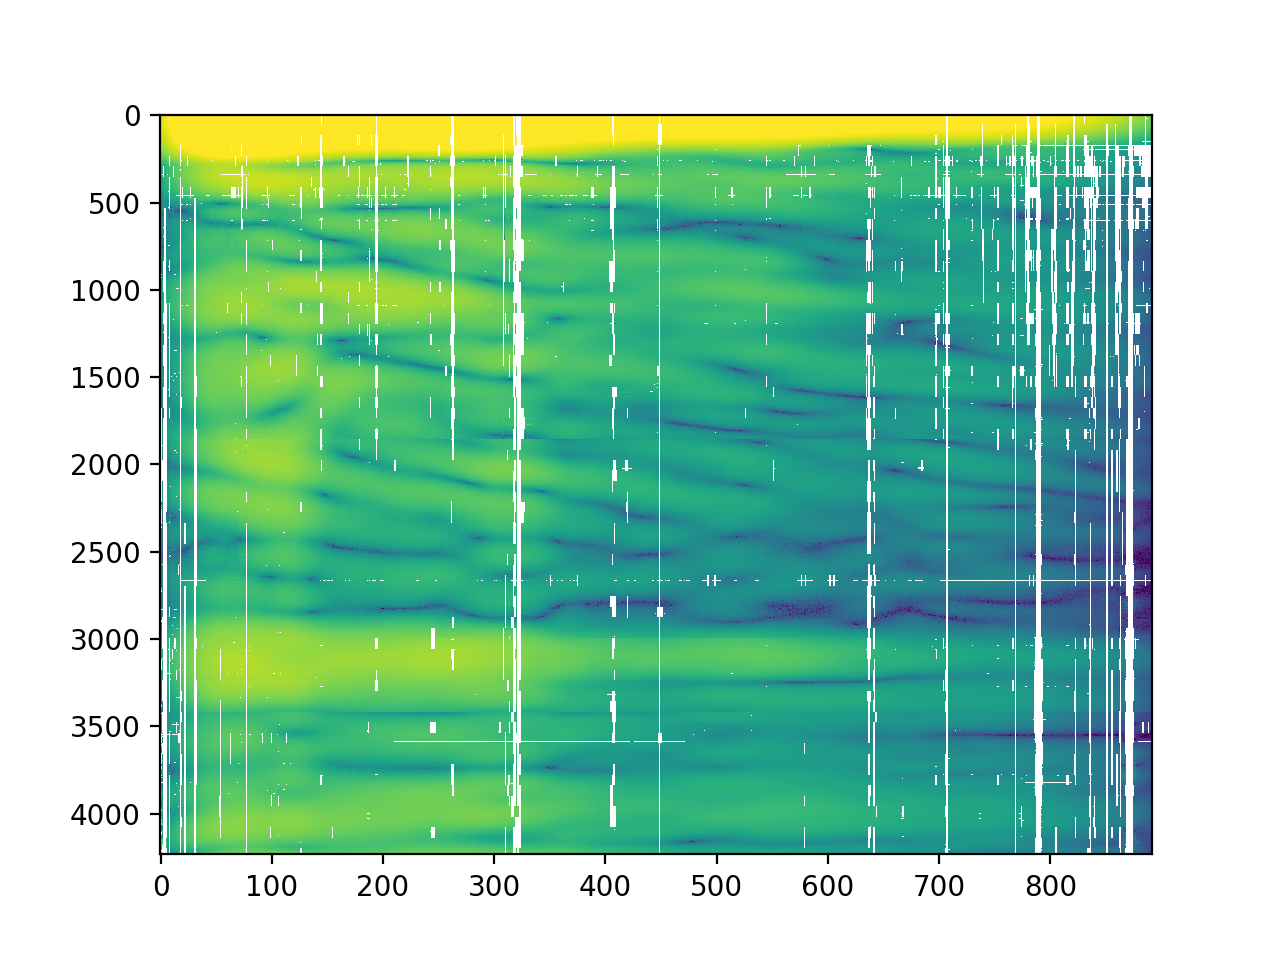

<IPython.core.display.Javascript object>


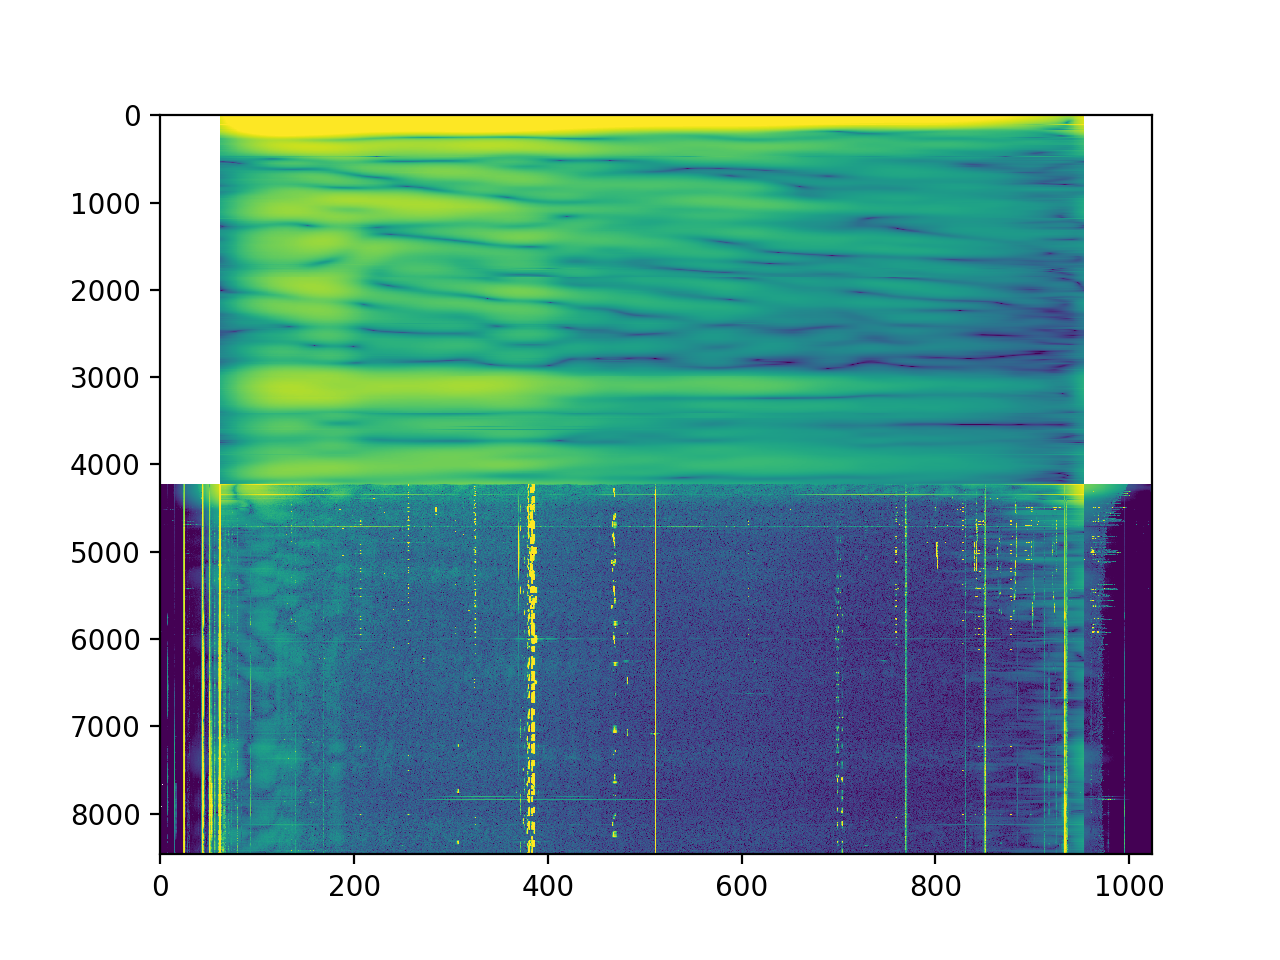

In [62]:
np.savez('philbull_data.npz', d=d, w=w, fqs=uv_info['freqs'], times=uv_info['lsts'])
d_avg_res = d_avg - d_avg_mdl
plt.figure()
uvtools.plot.waterfall(d*w, mode='log', mx=0, drng=4)
plt.show()
plt.figure()
uvtools.plot.waterfall(np.concatenate([d_avg_mdl,d_avg_res],axis=0), mode='log', mx=0, drng=4)
#uvtools.plot.waterfall(np.concatenate([d_avg_mdl,d_avg_res],axis=0), mode='phs')
plt.show()

In [23]:
for k in keys:
    #if d_mdl.has_key(k): continue
    print k
    d_mdl[k] = np.zeros_like(data[k])
    d,w = data[k][:,ch0:ch1], wgts[k][:,ch0:ch1]
    d_mdl[k][:,ch0:ch1], _, info = uvtools.dspec.delay_filter(d, w, 200., sdf, tol=1e-9, window='blackman-harris', skip_wgt=.1)
    #d_res[k] = (data[k] - d_mdl[k]) * wgts[k]

(25, 26, 'xx')
(123, 124, 'xx')
(83, 84, 'xx')
(36, 37, 'xx')
(66, 67, 'xx')
(86, 87, 'xx')
(121, 122, 'xx')
(68, 69, 'xx')
(53, 54, 'xx')
(70, 71, 'xx')
(40, 41, 'xx')
(67, 68, 'xx')
(13, 14, 'xx')
(120, 121, 'xx')
(87, 88, 'xx')
(1, 2, 'xx')
(12, 13, 'xx')
(85, 86, 'xx')
(54, 55, 'xx')
(24, 25, 'xx')
(23, 24, 'xx')
(11, 12, 'xx')
(84, 85, 'xx')
(37, 38, 'xx')
(65, 66, 'xx')
(122, 123, 'xx')
(82, 83, 'xx')
(38, 39, 'xx')
(69, 70, 'xx')
(26, 27, 'xx')
(141, 142, 'xx')
(39, 40, 'xx')
(52, 53, 'xx')
(0, 1, 'xx')
(142, 143, 'xx')


In [23]:
rfi_avg = hera_qm.xrfi.xrfi(d_avg_res, f=np.where(np.abs(d_avg_res) == 0, True, False), Kt=16, Kf=16, sig_init=4)
d_avg_rfi = np.where(rfi_avg, 0, d_avg)

<IPython.core.display.Javascript object>


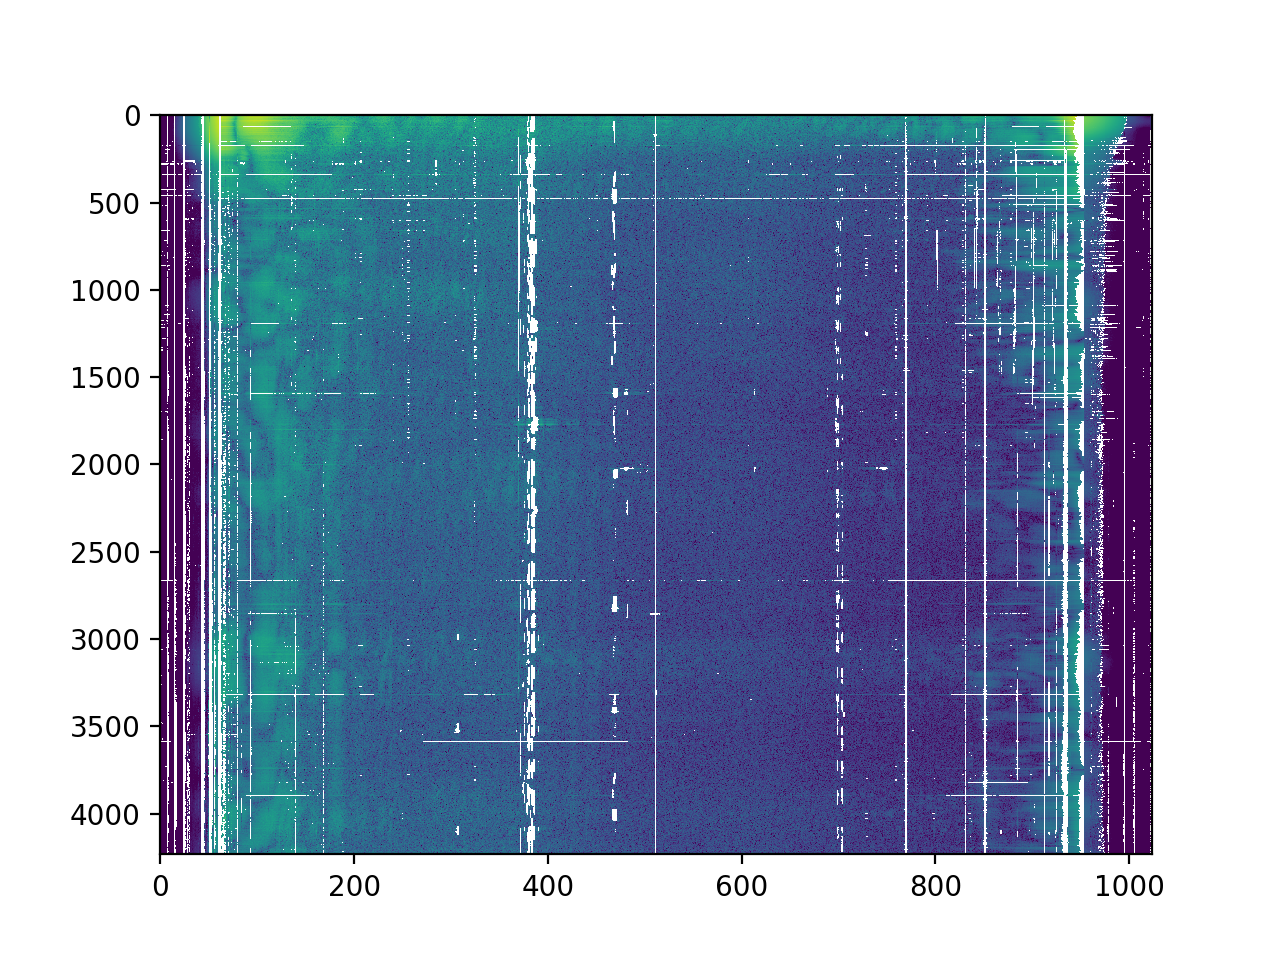

In [24]:
#x,y = np.where(rfi_avg)
#print x.shape
plt.figure()
uvtools.plot.waterfall(np.where(rfi_avg, 0, d_avg_res), mode='log', mx=0, drng=4)
#uvtools.plot.waterfall(rfi_avg, mode='lin', mx=1, drng=1)
plt.show()

divide by zero encountered in log10


<IPython.core.display.Javascript object>


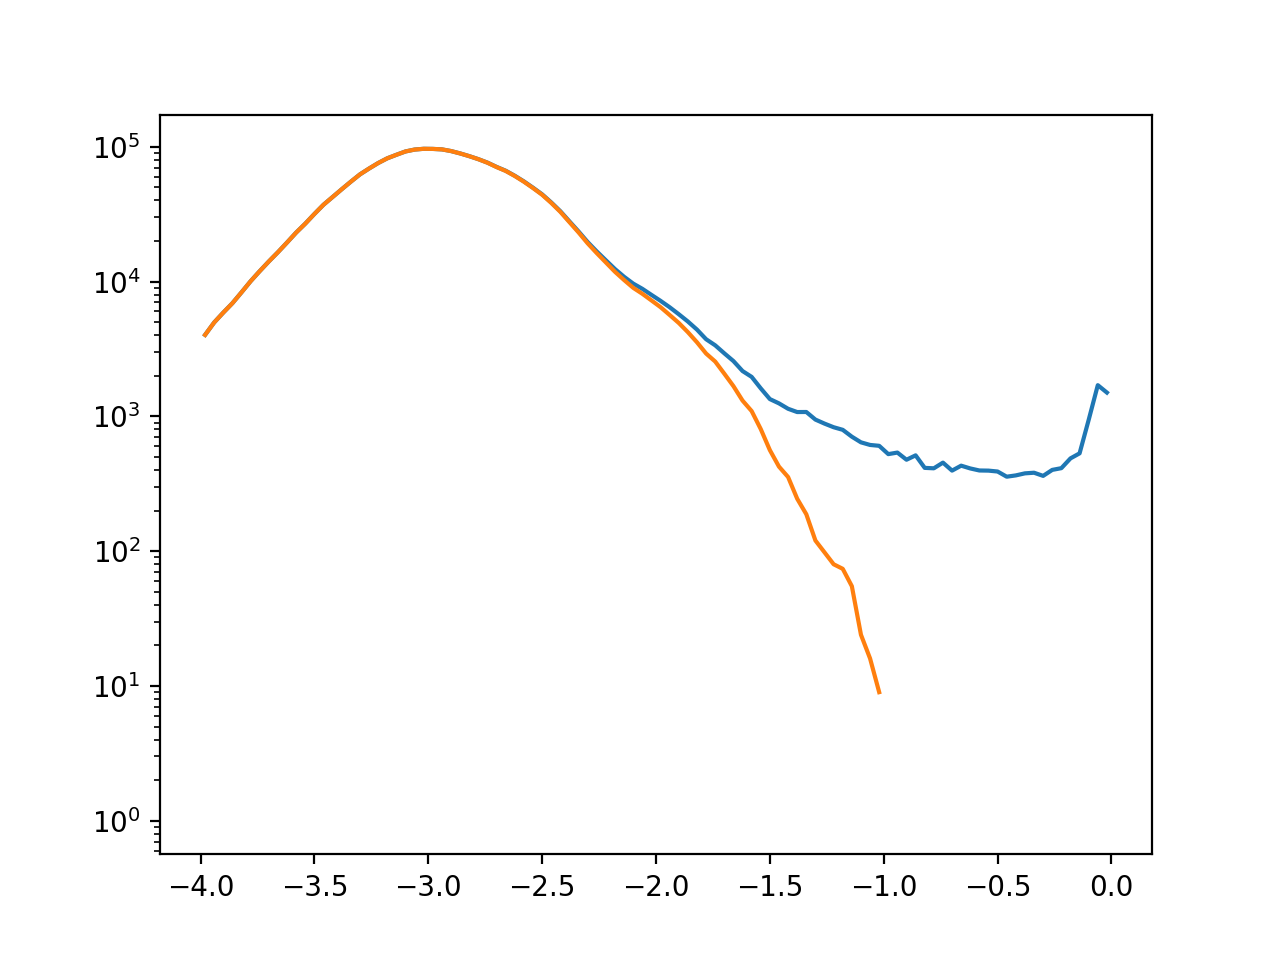

In [27]:
d_avg_rfi = np.where(rfi_avg, 0, d_avg_res)
h1, bins = np.histogram(np.log10(np.abs(d_avg_res[:,250:800].flatten())), bins=100, range=(-4,0))
h2, bins = np.histogram(np.log10(np.abs(d_avg_rfi[:,250:800].flatten())), bins=100, range=(-4,0))
bins = 0.5 * (bins[1:] + bins[:-1])
plt.figure()
plt.semilogy(bins, h1)
plt.semilogy(bins, h2)
plt.show()

<IPython.core.display.Javascript object>


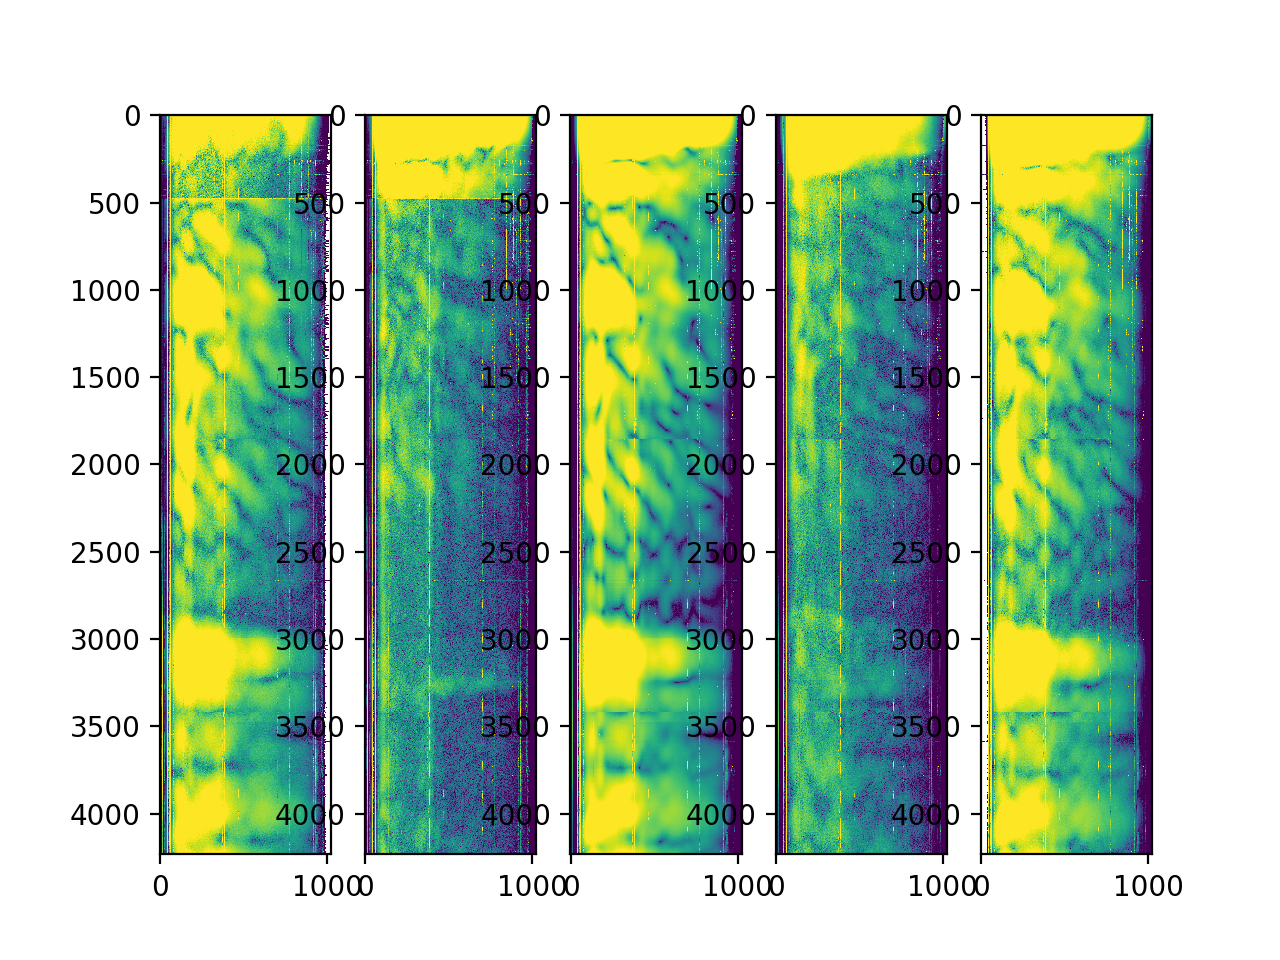

In [54]:
MX, DRNG = -1, 2
plt.figure()
plt.subplot(151); uvtools.plot.waterfall((data[(121,122,'xx')]), mode='log', mx=MX, drng=DRNG)
plt.subplot(152); uvtools.plot.waterfall((data[(121,122,'xx')]-d_avg), mode='log', mx=MX, drng=DRNG)
#plt.subplot(153); uvtools.plot.waterfall((data[(23,24,'xx')] - data[(1,2,'xx')]), mode='log', mx=MX, drng=DRNG)
plt.subplot(153); uvtools.plot.waterfall((d_avg), mode='log', mx=MX, drng=DRNG)
plt.subplot(154); uvtools.plot.waterfall((data[(23,24,'xx')]-d_avg), mode='log', mx=MX, drng=DRNG)
plt.subplot(155); uvtools.plot.waterfall((data[(23,24,'xx')]), mode='log', mx=MX, drng=DRNG)
plt.show()

<IPython.core.display.Javascript object>


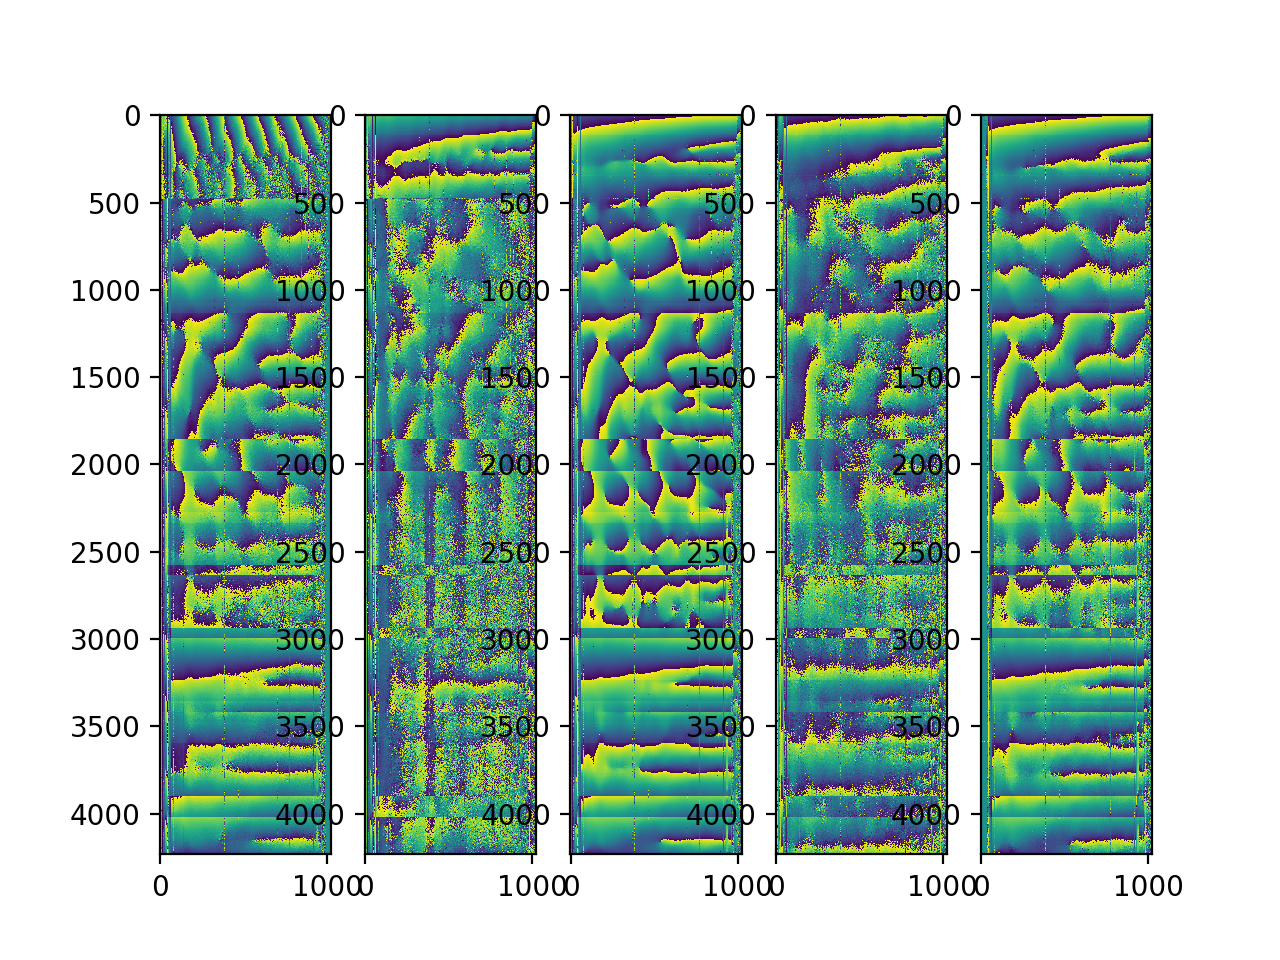

In [55]:
MX, DRNG = None,None
plt.figure()
plt.subplot(151); uvtools.plot.waterfall((data[(121,122,'xx')]), mode='phs', mx=MX, drng=DRNG)
plt.subplot(152); uvtools.plot.waterfall((data[(121,122,'xx')]-d_avg), mode='phs', mx=MX, drng=DRNG)
#plt.subplot(153); uvtools.plot.waterfall((data[(23,24,'xx')] - data[(1,2,'xx')]), mode='phs', mx=MX, drng=DRNG)
plt.subplot(153); uvtools.plot.waterfall((d_avg), mode='phs', mx=MX, drng=DRNG)
plt.subplot(154); uvtools.plot.waterfall((data[(23,24,'xx')]-d_avg), mode='phs', mx=MX, drng=DRNG)
plt.subplot(155); uvtools.plot.waterfall((data[(23,24,'xx')]), mode='phs', mx=MX, drng=DRNG)
plt.show()